##### Import Modules 

In [415]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [416]:
from category_encoders import BinaryEncoder
from datasist.structdata import detect_outliers
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler , RobustScaler
from sklearn.metrics import r2_score , mean_squared_error

In [417]:
warnings.filterwarnings('ignore')

In [418]:
sns.set_theme(context = 'notebook' , style = 'ticks' , palette = 'Set1' , 
             rc = {'figure.figsize' : (8,4)}) 

###### Read Dataset

In [419]:
df = pd.read_csv('fifa19.csv')

In [420]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Position,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,Value
0,L. Messi,31,Argentina,94,94,FC Barcelona,RF,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,ST,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,LW,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,GK,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,RCM,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,102.0


###### Check Feature 

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17955 entries, 0 to 17954
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17955 non-null  object 
 1   Age              17955 non-null  int64  
 2   Nationality      17955 non-null  object 
 3   Overall          17955 non-null  int64  
 4   Potential        17955 non-null  int64  
 5   Club             17955 non-null  object 
 6   Position         17907 non-null  object 
 7   Crossing         17907 non-null  float64
 8   Finishing        17907 non-null  float64
 9   HeadingAccuracy  17907 non-null  float64
 10  ShortPassing     17907 non-null  float64
 11  Volleys          17907 non-null  float64
 12  Dribbling        17907 non-null  float64
 13  Curve            17907 non-null  float64
 14  FKAccuracy       17907 non-null  float64
 15  LongPassing      17907 non-null  float64
 16  BallControl      17907 non-null  float64
 17  Acceleration

###### Check missing records 

In [422]:
(df.isnull().mean()*100).to_frame().T

,Name,Age,Nationality,Overall,Potential,Club,Position,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,Value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.267335,0.267335,0.267335,0.267335,...,0.267335,0.267335,0.267335,0.267335,0.267335,0.267335,0.267335,0.267335,0.267335,0.0


###### Check duplicates 

In [423]:
df.duplicated().sum()

0

In [424]:
df.dropna(axis = 0 , inplace = True  )

In [425]:
df.reset_index(inplace = True , drop = True)

In [426]:
df.drop(['Name'] , axis = 1 , inplace = True)

In [427]:
df['Nationality'].value_counts()

England      1655
Germany      1195
Spain        1071
Argentina     935
France        910
             ... 
Guam            1
Fiji            1
Liberia         1
Mauritius       1
Botswana        1
Name: Nationality, Length: 163, dtype: int64

In [428]:
df['Position'].value_counts().to_frame().T

,ST,GK,CB,CM,LB,RB,RM,LM,CAM,CDM,...,LDM,LS,RS,RWB,LWB,CF,LAM,RAM,RF,LF
Position,2130,1989,1751,1377,1304,1268,1114,1086,946,936,...,239,206,201,87,78,74,21,21,16,15


In [429]:
df['Club'].value_counts()

FC Barcelona               33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
                           ..
Vitória                    20
Bahia                      20
Sligo Rovers               19
Limerick FC                19
Derry City                 18
Name: Club, Length: 651, dtype: int64

###### Get high correlated Feature 

In [430]:
df_cat = df.select_dtypes('object_')

In [431]:
df_num = df.select_dtypes('number')

In [432]:
top_corr = df_num.corr()[np.abs(df_num.corr()['Value']) > 0.4].index

<AxesSubplot:>

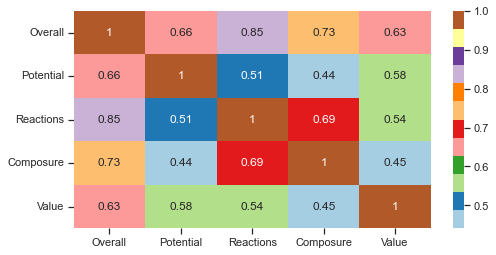

In [433]:
sns.heatmap(df[top_corr].corr() , annot = True , cmap = 'Paired' , )

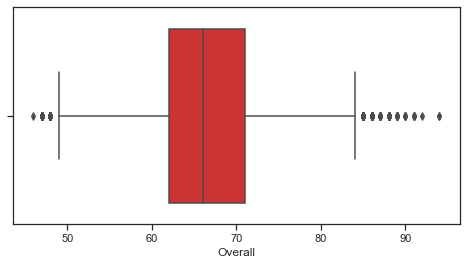

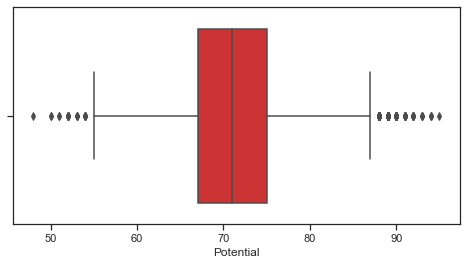

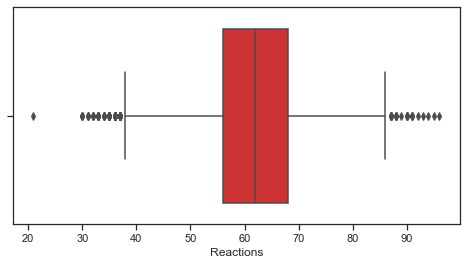

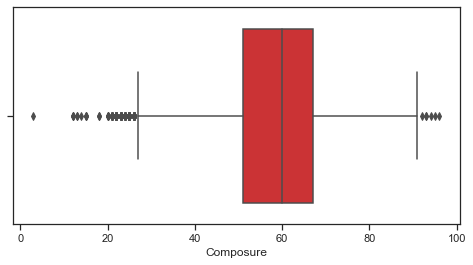

In [434]:
for i in df_num[top_corr].columns[:-1]:
    plt.figure()
    sns.boxplot(df_num[i])
    plt.show()

In [435]:
df = pd.concat([df_cat , df_num[top_corr]] , axis = 1 )

In [436]:
len(detect_outliers(df , 0 , ['Overall' , 'Potential' , 'Reactions' , 'Composure']))

480

###### Remove outliers 

In [438]:
df.drop(detect_outliers(df , 0 , ['Overall' , 'Potential' , 'Reactions' , 'Composure']) , 
        axis = 0 , inplace = True)

In [439]:
df.reset_index(inplace = True , drop = True)

In [440]:
df

,Nationality,Club,Position,Overall,Potential,Reactions,Composure,Value
0,Brazil,FC Porto,LB,84,87,83.0,80.0,32.00
1,Italy,Chelsea,CM,84,87,83.0,79.0,38.00
2,France,Olympique de Marseille,RM,84,87,83.0,82.0,39.00
3,Spain,Real Madrid,RB,84,87,82.0,77.0,31.50
4,Korea Republic,Tottenham Hotspur,LM,84,85,84.0,82.0,37.00
...,...,...,...,...,...,...,...,...
17373,England,Stevenage,CM,49,70,51.0,36.0,0.06
17374,Republic of Ireland,Bohemian FC,CM,49,59,48.0,42.0,0.05
17375,Scotland,Hamilton Academical FC,CM,49,64,48.0,48.0,0.06
17376,Colombia,Atlético Nacional,CM,49,62,52.0,44.0,0.05


<AxesSubplot:xlabel='Overall', ylabel='Value'>

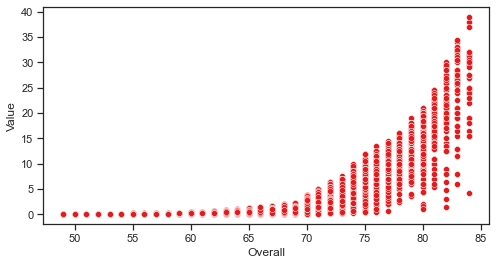

In [441]:
sns.scatterplot(data = df , x = 'Overall' , y = 'Value')

<AxesSubplot:xlabel='Potential', ylabel='Value'>

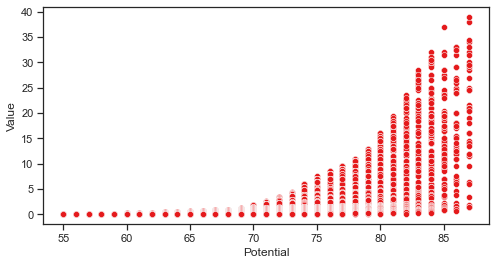

In [442]:
sns.scatterplot(data = df , x = 'Potential' , y = 'Value')

<AxesSubplot:xlabel='Reactions', ylabel='Value'>

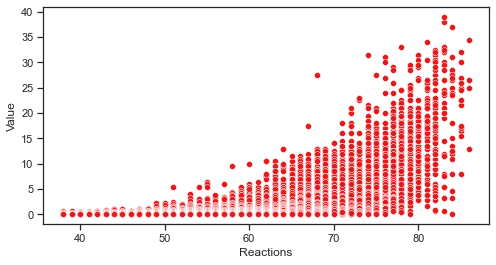

In [443]:
sns.scatterplot(data = df , x = 'Reactions' , y = 'Value')

<AxesSubplot:xlabel='Composure', ylabel='Value'>

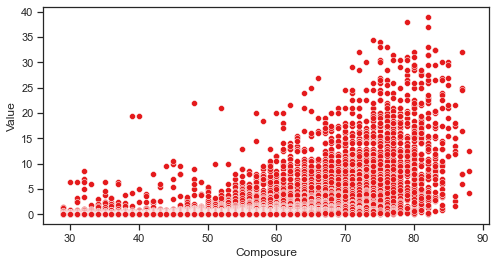

In [445]:
sns.scatterplot(data = df , x = 'Composure' , y = 'Value')

###### Time to encode our categorical 

In [446]:
col_to_encod = ['Nationality' , 'Club' , 'Position']

In [447]:
encoder = BinaryEncoder()

In [448]:
df = pd.concat([df , encoder.fit_transform(df[col_to_encod])] , axis = 1 )

In [449]:
df.drop(col_to_encod , axis = 1 , inplace = True)

In [450]:
df.columns

Index(['Overall', 'Potential', 'Reactions', 'Composure', 'Value',
       'Nationality_0', 'Nationality_1', 'Nationality_2', 'Nationality_3',
       'Nationality_4', 'Nationality_5', 'Nationality_6', 'Nationality_7',
       'Club_0', 'Club_1', 'Club_2', 'Club_3', 'Club_4', 'Club_5', 'Club_6',
       'Club_7', 'Club_8', 'Club_9', 'Position_0', 'Position_1', 'Position_2',
       'Position_3', 'Position_4'],
      dtype='object')

###### Split data to train & test 

In [451]:
x = df.drop(['Value'] , axis = 1 )

In [452]:
y = np.log(df['Value'])

In [453]:
x_train , x_test , y_train , y_test = train_test_split(x , y , 
                                                       test_size = 0.2 , random_state = 7 , 
                                                       shuffle = True)

###### Scale our Numerical 

In [454]:
col_to_scl = ['Overall' , 'Potential' , 'Reactions' , 'Composure']

In [455]:
sclr = StandardScaler()

In [456]:
x_train[col_to_scl] = sclr.fit_transform(x_train[col_to_scl])

In [457]:
x_test[col_to_scl] = sclr.transform(x_test[col_to_scl])

###### Multivariable Regression 

In [458]:
lmodel = LinearRegression()

In [459]:
lmodel.fit(x_train , y_train)

LinearRegression()

In [460]:
y_pred = lmodel.predict(x_test)

In [461]:
mean_squared_error(y_true = y_test , y_pred = y_pred , squared = False)

0.33871983445410714

In [462]:
r2_score(y_true = y_test , y_pred = y_pred )

0.935170639791307

In [463]:
lmodel.coef_

array([ 9.86745516e-01,  4.17673724e-01, -8.73254025e-03,  6.81232481e-03,
       -1.16026082e-02,  5.01685002e-02,  8.84752397e-03,  2.02928736e-02,
       -9.76892925e-03,  2.40274216e-03,  7.39454188e-04, -4.41939258e-03,
       -3.69490195e-03, -5.80520811e-02,  5.23682374e-07,  1.40989002e-02,
        3.66010946e-03, -1.91319480e-03, -8.56673599e-03,  9.22588789e-03,
       -6.68071556e-03,  5.90767156e-03,  3.36277319e-02,  6.50272563e-02,
       -7.83050684e-02, -5.09713410e-02,  8.76336894e-02])

###### Polynomial Regression 

In [464]:
pf = PolynomialFeatures(degree = 2)

In [465]:
x_train = pf.fit_transform(x_train)

In [466]:
x_test = pf.fit_transform(x_test)

In [467]:
pmodel = LinearRegression()

In [468]:
pmodel.fit(x_train , y_train)

LinearRegression()

In [469]:
y_pred = pmodel.predict(x_test)

In [470]:
mean_squared_error(y_true = y_test , y_pred = y_pred , squared = False)

0.30027055902715827

In [473]:
r2_score(y_true = y_test , y_pred = y_pred)

0.9490533087530152